In [1]:
library(ISLR)

In [2]:
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [3]:
head(Hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
dim(Hitters)

[1] 322  20

In [9]:
sum(is.na(Hitters))

[1] 59

In [10]:
Hitters = na.omit(Hitters)
dim(Hitters)

[1] 263  20

# Best Subset Selection

In [19]:
library(leaps)
regfit.full = regsubsets(Salary~., data=Hitters)

In [21]:
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " "

In [22]:
regfit.full = regsubsets(Salary~., data=Hitters, nvmax=19)
reg.summary = summary(regfit.full)
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [23]:
reg.summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

In [ ]:
# find index with the maximum adjusted R^2
which.max(reg.summary$adjr2)

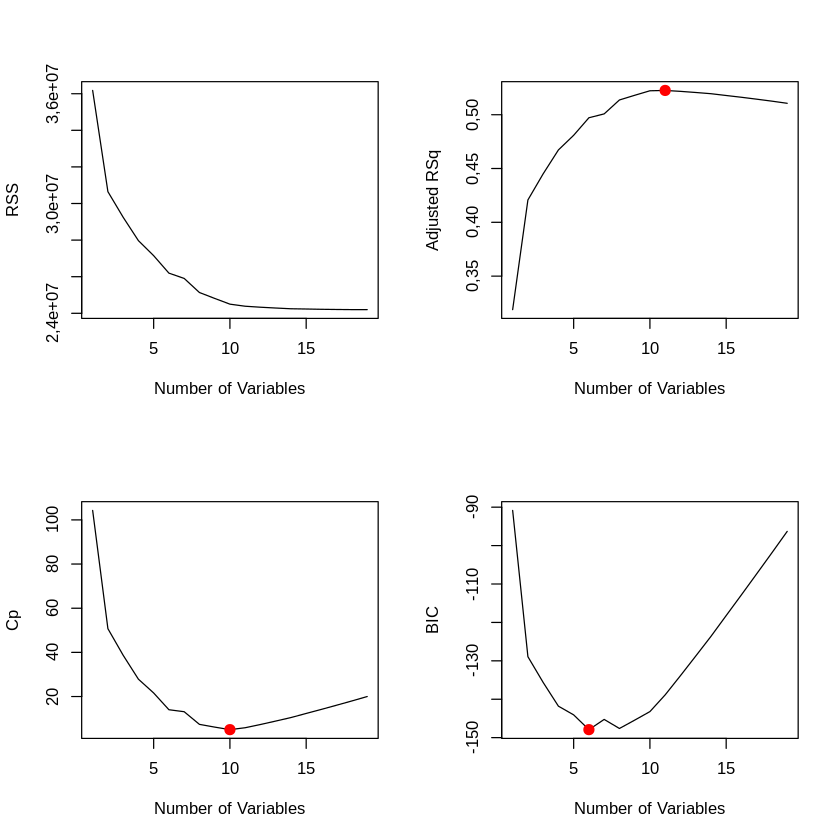

In [40]:
par(mfrow=c(2, 2))
plot(reg.summary$rss, xlab="Number of Variables", ylab="RSS", type="l")
plot(reg.summary$adjr2, xlab="Number of Variables", ylab="Adjusted RSq", type="l")
points(11, reg.summary$adjr2[11], col="red", cex=2, pch=20)

min_cp = which.min(reg.summary$cp)
plot(reg.summary$cp, xlab="Number of Variables", ylab="Cp", type="l")
points(min_cp, reg.summary$cp[min_cp], col="red", cex=2, pch=20)

min_bic = which.min(reg.summary$bic)
plot(reg.summary$bic, xlab="Number of Variables", ylab="BIC", type="l")
points(min_bic, reg.summary$bic[min_bic], col="red", cex=2, pch=20)

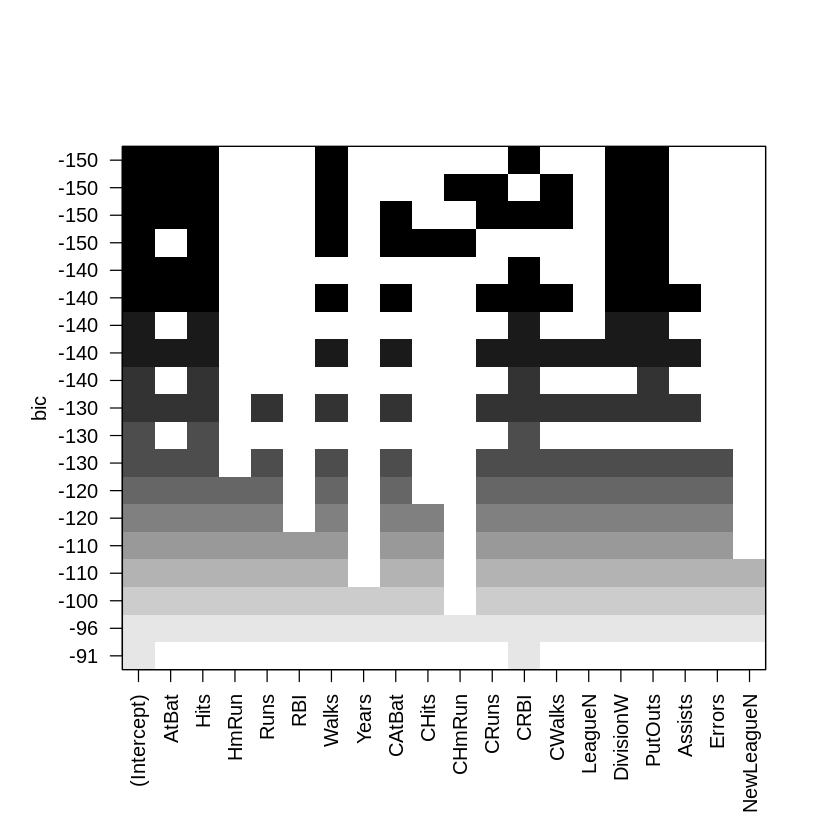

In [43]:
plot(regfit.full, scale="bic")

In [44]:
coef(regfit.full, 6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91,5117981   -1,8685892    7,6043976    3,6976468    0,6430169 -122,9515338 
     PutOuts 
   0,2643076

# Forward and Backward Stepwise Selection

In [47]:
regfit.fwd = regsubsets(Salary~., data=Hitters, nvmax=19, method="forward")
regfit.bwd = regsubsets(Salary~., data=Hitters, nvmax=19, method="backward")
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

# Cross-Validation

In [65]:
set.seed(1)
train = sample(c(TRUE, FALSE), nrow(Hitters), rep=TRUE)
test = !train

In [66]:
regfit.best = regsubsets(Salary~., data=Hitters[train,], nvmax=19)

In [67]:
test.mat = model.matrix(Salary~., data=Hitters[test,])

In [68]:
val.errors = rep(NA, 19)
for (i in 1:19) {
    coefi = coef(regfit.best, id=i)
    pred = test.mat[, names(coefi)]%*%coefi
    val.errors[i] = mean((Hitters$Salary[test] - pred) ^ 2)
}

In [69]:
val.errors

[1] 164377,3 144405,5 152175,7 145198,4 137902,1 139175,7 126849,0 136191,4
 [9] 132889,6 135434,9 136963,3 140694,9 140690,9 141951,2 141508,2 142164,4
[17] 141767,4 142339,6 142238,2

In [70]:
which.min(val.errors)

[1] 7

In [72]:
coef(regfit.best, 7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
  67,1085369   -2,1462987    7,0149547    8,0716640    1,2425113   -0,8337844 
   DivisionW      PutOuts 
-118,4364998    0,2526925

In [81]:
predict.regsubsets = function(object, newdata, id, ...) {
    form = as.formula(object$call[[2]])
    mat = model.matrix(form, newdata)
    coefi = coef(object, id)
    xvars = names(coefi)
    mat[,xvars]%*%coefi
}

In [82]:
# training new model on all of the data
regfit.best = regsubsets(Salary~., data=Hitters, nvmax=19)
coef(regfit.best, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79,4509472    1,2833513    3,2274264   -0,3752350    1,4957073    1,4420538 
   DivisionW      PutOuts 
-129,9866432    0,2366813

In [83]:
# Using Cross-Validation
k = 10
folds = sample(1:k, nrow(Hitters), replace=TRUE)
cv.errors = matrix(NA, k, 19, dimnames=list(NULL, paste(1:19)))

In [99]:
for (j in 1:k) {
    best.fit = regsubsets(Salary~., data=Hitters[folds != j,], nvmax=19)
    for (i in 1:19) {
        pred = predict(best.fit, Hitters[folds==j,], id=i)
        cv.errors[j, i] = mean((Hitters$Salary[folds==j] - pred) ^ 2)
    }
}
cv.errors

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
"94082,50","85564,76","106982,28","106959,54","107347,70","91911,49","95517,82","92508,15","105224,66","92509,45","96418,41","94026,69","97503,47","95413,54","95666,50","96299,67","95917,70","96120,62","95998,43"
"212762,89","244081,41","231913,14","221143,81","222892,91","214055,13","213285,37","204436,10","201912,05","201634,50","203787,70","200624,69","202618,33","203789,13","203184,69","202098,97","201754,69","201911,06","201914,61"
"181265,72","176271,97","172349,72","136248,83","128383,26","116987,83","127553,29","116263,26","116591,98","112693,54","114167,38","114588,58","114126,78","117277,99","117440,01","116675,11","116927,97","116958,71","117020,92"
"171516,25","140760,93","150389,28","143830,23","135310,21","120791,15","131881,02","118991,74","135321,56","139139,12","128335,70","132657,42","135323,81","141297,57","140673,69","139411,15","138949,91","138841,40","138667,33"
"208000,82","163238,43","167733,24","166868,11","182585,71","171177,54","161837,38","146803,43","149103,53","148224,26","149567,31","152212,64","153106,02","153570,40","152995,13","153626,95","152880,36","152949,16","152800,60"
"83275,95","70356,74","62895,18","75756,98","62738,95","55071,51","67370,28","57865,58","63429,68","60840,39","62345,72","63206,16","62247,44","63027,93","62376,13","62539,85","62416,80","62269,45","62342,51"
"262360,34","234528,76","218963,74","205018,27","172082,45","158249,52","183294,62","157741,72","155844,19","148422,79","164195,62","164792,71","169234,60","172012,24","169412,88","174561,55","176301,50","178061,02","177887,67"
"127641,71","103039,73","176413,91","164879,26","147599,35","166660,63","154578,61","95694,07","114024,41","109768,52","95140,05","99310,68","103029,17","105297,83","105376,13","110900,66","109881,48","109212,63","108994,55"
"127693,16","142313,75","168730,69","147814,44","132418,78","116428,23","125900,05","94160,73","111811,18","103523,32","101992,78","107574,58","106135,25","107384,58","107167,85","107219,98","106014,41","105867,83","105933,83"
"37261,62","39223,69","40567,76","37972,44","38423,41","36696,61","43648,05","41630,89","45921,61","39976,62","42338,95","41927,24","40526,07","40068,13","38977,61","39313,85","39309,88","39224,36","39219,83"


In [100]:
# compute mean error for each column in the cv.errors
mean.cv.errors = apply(cv.errors, 2, mean)
mean.cv.errors

1        2        3        4        5        6        7        8 
150586,1 139938,0 149693,9 140649,2 132978,3 124803,0 130486,7 112609,6 
       9       10       11       12       13       14       15       16 
119918,5 115673,3 115829,0 117092,1 118385,1 119913,9 119327,1 120264,8 
      17       18       19 
120035,5 120141,6 120078,0

In [88]:
which.min(mean.cv.errors)

8 
8

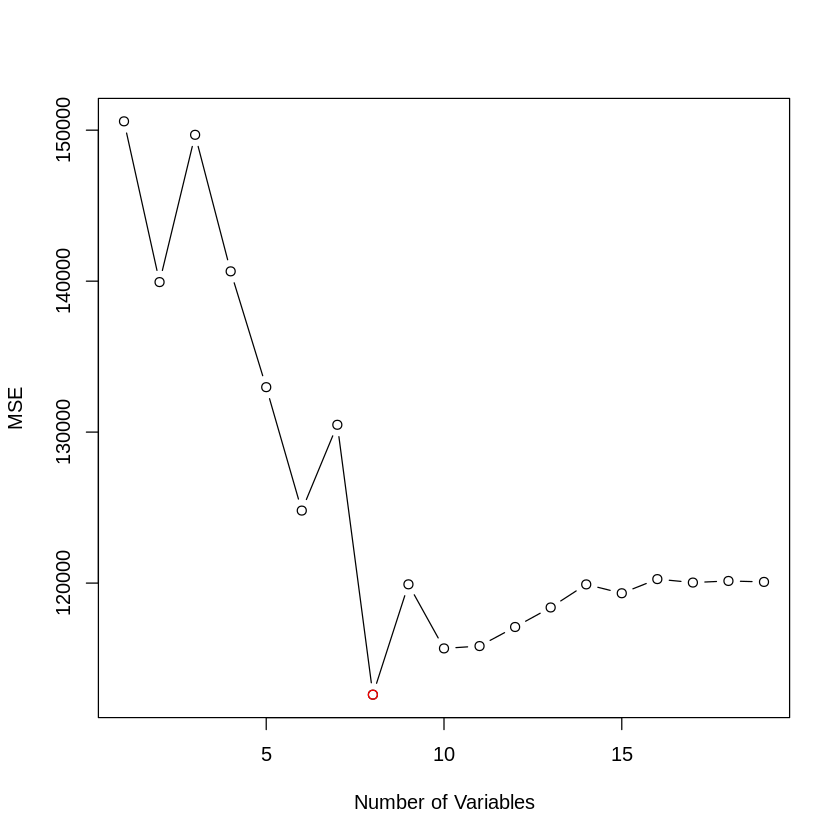

In [98]:
plot(mean.cv.errors, xlab="Number of Variables", ylab="MSE", type="b")
min_error_idx = which.min(mean.cv.errors)
points(min_error_idx, mean.cv.errors[min_error_idx], col="red")